In [15]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import numpy as np
import shutil
import os
import random
import pandas as pd

In [3]:
def generate_train_val(path,frac_test=0.3):
    
    if os.path.isdir(path):
        os.chdir(path)
        
        if not os.path.isdir('train'):
            os.mkdir('train')
        
        if not os.path.isdir('val'):
            os.mkdir('val')
            
        class_folders = glob.glob('*')
        
        for folder_name in class_folders:
            
            if folder_name not in ['val','train','holdout']:
                
                if not os.path.isdir('train/%s' %folder_name):
                    os.mkdir('train/%s' %folder_name)
                
                if not os.path.isdir('val/%s' %folder_name):
                    os.mkdir('val/%s' %folder_name)
                    
                folder_contents = glob.glob('%s/*.jpg' %folder_name)
                
                ntest = int(frac_test*len(folder_contents))
                ntrain = len(folder_contents) - ntest
                
                random.shuffle(folder_contents)
                
                train = folder_contents[:ntrain]
                test = folder_contents[ntrain:]
                
                print(len(train),len(test))
                
                #Copy appropriate images to training folder 
                
                for image_name in train:
                    image = image_name.split('/')[-1]
                    #print(f'Training image {image}')
                    shutil.copyfile(image_name,'train/'+folder_name+'/'+image)
                
                #Copy appropriate images to validation folder 
                
                for image_name in test:
                    image = image_name.split('/')[-1]
                    #print(f'Testing image {image}')
                    shutil.copyfile(image_name,'val/'+folder_name+'/'+image)
                    
            
    else:
        print(f'Path {path} does not exist')

In [4]:
apples_dir = '/Users/rmartinshort/Documents/DS_projects/fruit_classification/apple_classification'

Rename the directories

In [7]:
#in the holdout set
for dirname in glob.glob(apples_dir+'/holdout/*'):
    newname = dirname.replace(' ','_')
    shutil.move(dirname,newname)

In [8]:
#in the training/test set
for dirname in glob.glob(apples_dir+'/*'):
    newname = dirname.replace(' ','_')
    shutil.move(dirname,newname)

Check how many images are in each class

In [13]:
images = {}
for fname in glob.glob(apples_dir+'/*'):
    
    folder_name = fname.split('/')[-1]
    
    if folder_name not in ['holdout']:
        
        nimages = len(glob.glob(apples_dir+'/'+folder_name+'/*.jpg'))
        images[folder_name] = nimages

In [18]:
images = pd.Series(images)

In [21]:
mean_image_number = int(images.mean())

Make an 'Other' category and put a random selection of other fruit images in there

In [34]:
fruits_data = '/Users/rmartinshort/Documents/DS_projects/fruit_classification/fruits/fruits-360/Training'

In [61]:
def generate_other_class(drawing_from,transfer_to,holdout=False):
    
    '''To generate a class of fruit called 'Other' by selecting random images of
    non-apple fruit from folders in a given location'''
    
    #Determine the number of images in each class directory within the transfer_to
    #folder
    
    images = {}
    
    if holdout == True:
        dir_list = glob.glob(transfer_to+'/holdout/*')
    else:
        dir_list = glob.glob(transfer_to+'/*')
        
    for fname in dir_list:

        folder_name = fname.split('/')[-1]

        if folder_name not in ['holdout','Other']:
            
            if holdout == True:
                nimages = len(glob.glob(transfer_to+'/holdout/'+folder_name+'/*.jpg'))
            else:
                nimages = len(glob.glob(transfer_to+'/'+folder_name+'/*.jpg'))
                
            images[folder_name] = nimages

    images = pd.Series(images)
    
    mean_image_number = int(images.mean())
    
    #Find the number of directories in the drawing from folder, in order to determine how
    #many images to draw from each one
    dircount = 0
    for otherdir in glob.glob(drawing_from+'/*'):
        
        if 'Apple' not in otherdir:
            dircount += 1
    
    nimage_per_dir = round(int(images.mean())/dircount)
    
    for otherdir in glob.glob(drawing_from+'/*'):
        
        if 'Apple' not in otherdir:

            otherclassname = otherdir.split('/')[-1].replace(' ','_')
            images = glob.glob(otherdir+'/*')
            images_to_copy = np.random.choice(images,nimage_per_dir)

            for image in images_to_copy:

                image_name = image.split('/')[-1]
                if holdout == True:
                    shutil.copy(image,transfer_to+'/holdout/Other/'+otherclassname+'_'+image_name)
                else:
                    shutil.copy(image,transfer_to+'/holdout/Other/'+otherclassname+'_'+image_name)
  

In [62]:
#Generate test and train split inside the dir that we just made
generate_train_val(apples_dir)

343 147
345 147
0 0
337 144
311 133
353 150
345 147
345 147
320 136
345 147
471 201
345 147
345 147
345 147
301 128


Lets look at some of these images

In [65]:
def image_bank(example_dir,nimages=30):

    fig = plt.figure(figsize=(25, 4))
    images = glob.glob(example_dir+'/*')
    nimages = 30
    for idx in np.arange(nimages):
      ax = fig.add_subplot(3, 10, idx+1, xticks=[], yticks=[])
      ax.imshow(Image.open(images[idx]))

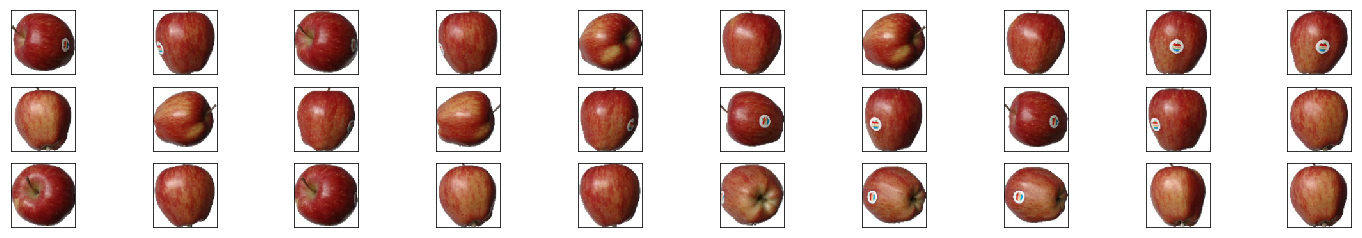

In [66]:
image_bank('/Users/rmartinshort/Documents/DS_projects/fruit_classification/apple_classification/Apple_Red_1')

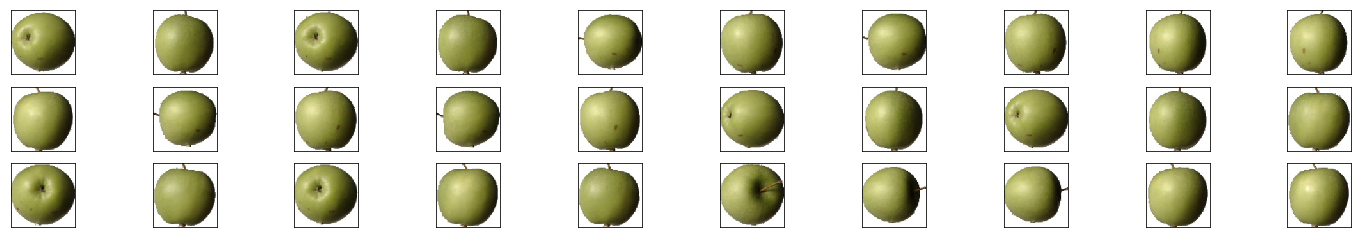

In [67]:
image_bank('/Users/rmartinshort/Documents/DS_projects/fruit_classification/apple_classification/Apple_Granny_Smith')